In [1]:
import torch

epochs = 100
lr = 0.00001
train_batch_size = 32
test_batch_size = 1
ck_dir = 'checkpoint/scheduler'
device = torch.device('cuda:2')

In [2]:
TRAIN_PATH = './skin_leison/training'
TEST_PATH = './skin_leison/testing'

In [3]:
from torch.utils.data import DataLoader

from dataset import Skin_Leison

trainset = Skin_Leison(TRAIN_PATH)
testset = Skin_Leison(TEST_PATH)
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=test_batch_size, num_workers=4)

In [4]:
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

from models.Unet import Unet

net = Unet(3, 1, 64, 4).to(device)
optimizer = Adam(net.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
criterion = nn.BCELoss()

In [5]:
from train import train

result = train(net, trainloader, testloader, epochs, optimizer, criterion, device=device, scheduler=scheduler, ck_dir=ck_dir)

Epoch: 0, Train Loss: 0.776782579421997, Test Loss: 0.72075151398778
Saving model to checkpoint/scheduler/check0.pt
Epoch: 1, Train Loss: 0.6705485582351683, Test Loss: 0.5974505625665192
val_loss improved from 0.7208 to 0.5975, saving model to checkpoint/scheduler/check1.pt
Epoch: 2, Train Loss: 0.5979468989372254, Test Loss: 0.5312275750935079
val_loss improved from 0.5975 to 0.5312, saving model to checkpoint/scheduler/check2.pt
Epoch: 3, Train Loss: 0.5365120804309844, Test Loss: 0.48410458758473396
val_loss improved from 0.5312 to 0.4841, saving model to checkpoint/scheduler/check3.pt
Epoch: 4, Train Loss: 0.46958218693733206, Test Loss: 0.45414598062634465
val_loss improved from 0.4841 to 0.4541, saving model to checkpoint/scheduler/check4.pt
Epoch: 5, Train Loss: 0.4113980388641358, Test Loss: 0.3874397584050894
val_loss improved from 0.4541 to 0.3874, saving model to checkpoint/scheduler/check5.pt
Epoch: 6, Train Loss: 0.36697783827781677, Test Loss: 0.35864973112940796
val_los

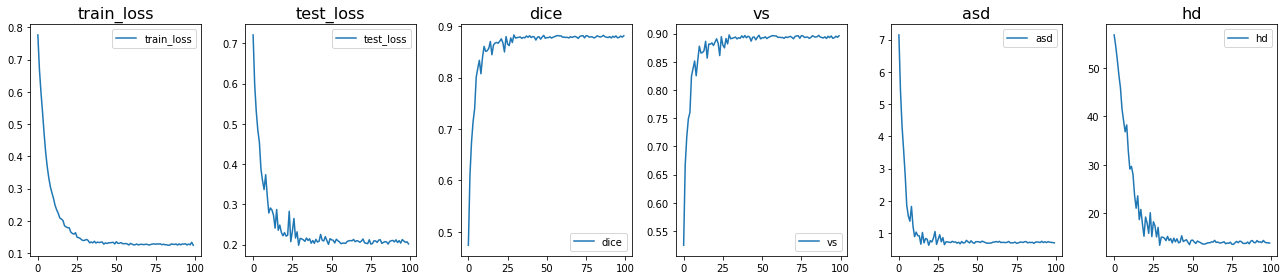

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,4))
keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
for i, (col, key) in enumerate(zip(axes, keys)):
    col.plot(range(len(result[key])), result[key], label=key)
    col.set_title(key, fontsize=16)
    col.legend()
fig.tight_layout()

In [7]:
import json
from pathlib import Path

json_path = Path(ck_dir)/'result.json'
json_path.parent.mkdir(parents=True, exist_ok=True)
with open(json_path, 'w') as fp:
    json.dump(result, fp, sort_keys=True, indent=4)